In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def aFunc(x,y,z):
    return x+y+z

cache=[]
x=1
y=2
z=3
cache.append((y,z))
print cache
print aFunc(x,y,z)
for i, params in enumerate(cache):
    print params
    print aFunc(x, *params)

[(2, 3)]
6
(2, 3)
6


In [40]:
a={}
a['a']=1
a['b']=2
a['c']=3
a['d']=4
b=('a', 'b')
print [a[key] for key in b]


[1, 2]


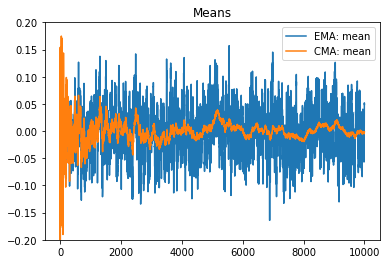

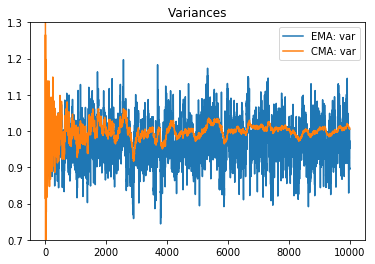

In [48]:
num=10000
momentum=0.9
samples=30

running_mean=0.0
est_mean=0.0
running_var=0.0
est_var=0.0
running_means, running_vars, est_means, est_vars=[], [], [], []
for i in range(1,num+1):
    x=np.random.normal(loc=0.0, scale=1.0, size=(samples,))
    
    running_mean=momentum*running_mean + (1-momentum)*np.mean(x)
    running_var=momentum*running_var + (1-momentum)*np.var(x)
    running_means.append(running_mean)
    running_vars.append(running_var)
    
    for j in range(samples):
        t=i+j
        est_mean_prev=est_mean
        est_mean=((t-1)*est_mean + x[j])/t
        
        est_var = ((t-2)*est_var + (x[j]-est_mean)**2) \
                                                  /(1.*(t-1)) \
                      + (est_mean - est_mean_prev)**2 if t>1 else 0.0
    est_means.append(est_mean)
    est_vars.append(est_var)

plt.plot(running_means, label='EMA: mean')
plt.plot(est_means, label='CMA: mean')
plt.ylim(-0.2,0.2)
plt.title('Means')
plt.legend()
plt.show()

plt.plot(running_vars, label='EMA: var')
plt.plot(est_vars, label='CMA: var')
plt.ylim(0.7,1.3)
plt.title('Variances')
plt.legend()
plt.show()